# Student Name: Mina Jmashidian & Student Number: D20124995
 
**Finding 4 Top games by Active users**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# Reafding Dataset
df = pd.read_csv('../steam_reviews.csv') 

In [3]:
# show the head of dataset
df.head(3)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09


In [4]:
# shape of dataste
print(df.shape)


(21747371, 23)


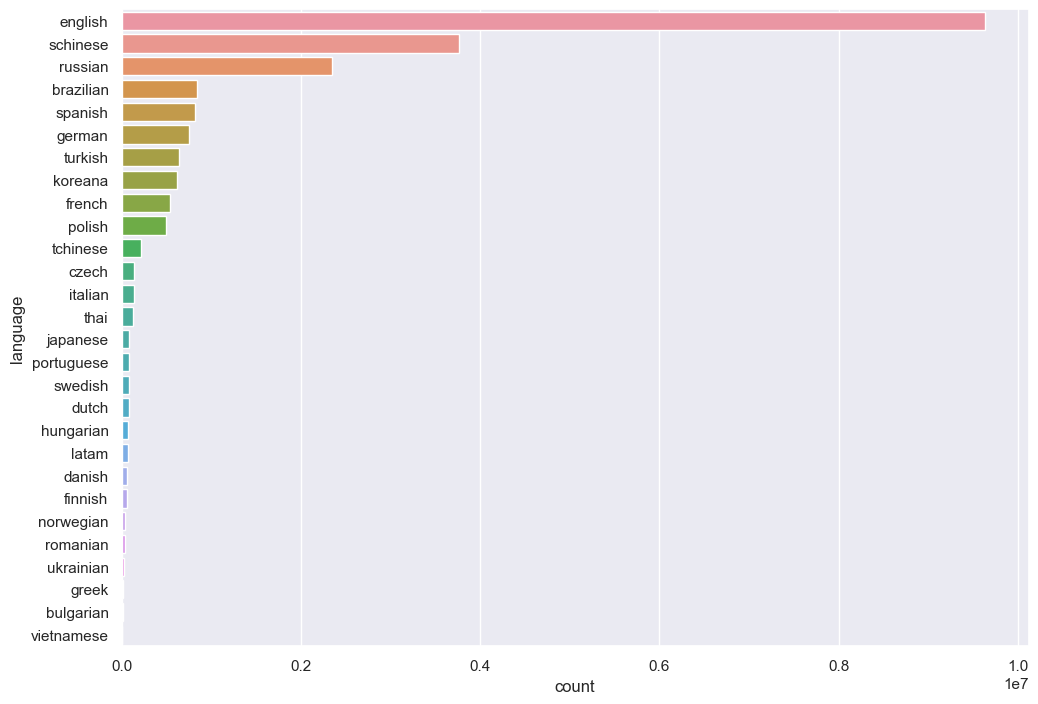

In [6]:
# Plotting the Languages of all  21 million reviews  

sns.countplot(data=df, y="language", 
             order = df['language'].value_counts().index)
plt.show()

In [7]:
# Selecting just the English reviews
df_en =df[df["language"] == 'english']
df_en.head(3)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
5,5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
6,6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09


In [8]:
print(df_en.shape)

(9635437, 23)


In [ ]:
# num_games_owned - number of games owned by the user
# num_reviews - number of reviews written by the user
# playtime_forever - lifetime playtime tracked in this app
# playtime_last_two_weeks - playtime tracked in the past two weeks for this app
# playtime_at_review - playtime when the review was written
# last_played - time for when the user last played

In [9]:
# num_games_owned - number of games owned by the user

grouped_single = df_en.groupby('author.steamid', as_index=False).agg({"author.num_games_owned": "max"})
grouped_single

,author.steamid,author.num_games_owned
0,76561197960265730,52
1,76561197960265745,87
2,76561197960265747,335
3,76561197960265778,778
4,76561197960265781,553
...,...,...
5287713,76561199132972128,1
5287714,76561199132989128,1
5287715,76561199133026644,1
5287716,76561199133107792,2


In [10]:
df2 = grouped_single.sort_values('author.num_games_owned')
df2

,author.steamid,author.num_games_owned
3172433,76561198195722202,0
3925542,76561198332085066,0
4113915,76561198367154146,0
2881897,76561198155958038,0
1736464,76561198071286626,0
...,...,...
474647,76561198001678750,21865
215786,76561197979911851,22024
2555573,76561198127787009,4398046511151
1723651,76561198070649181,4398046511170


In [11]:
#After sorting and calculating the number of games owned by each user, 
#it was found that three users had the most games
# In order to calculate the mean number of games owned by each user, 
#these three users were removed from the calculation.
grouped_single_remove= grouped_single.apply(lambda row: row[grouped_single[
    'author.steamid'].isin([76561198127787009, 76561198070649181, 76561198039421205])== False])

grouped_single_remove.sort_values('author.num_games_owned')

,author.steamid,author.num_games_owned
4551721,76561198832968138,0
5132249,76561199061099831,0
5101629,76561199048310533,0
2577974,76561198129564856,0
4952591,76561199001137323,0
...,...,...
377169,76561197995008105,19465
1041092,76561198037867621,20420
87865,76561197969050296,20972
474647,76561198001678750,21865


In [12]:
# calculate the mean number of games owned by each user
n =grouped_single_remove['author.num_games_owned'].mean()
n

119.66360724812135

In [13]:
mean_gam_own = grouped_single[grouped_single["author.num_games_owned"] >=n]

In [14]:
mean_gam_own.sort_values('author.num_games_owned')

,author.steamid,author.num_games_owned
118652,76561197970793616,120
1027168,76561198036969406,120
200825,76561197978068876,120
885038,76561198028171807,120
2692670,76561198139119171,120
...,...,...
474647,76561198001678750,21865
215786,76561197979911851,22024
2555573,76561198127787009,4398046511151
1723651,76561198070649181,4398046511170


In [15]:
# The data for Users who owned more than 119.66 games, 
# including the three users with the highest number of games, were then collected
df_new= df_en.apply(lambda row: row[df_en['author.steamid'].isin(mean_gam_own['author.steamid'])])
df_new.head(3)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
20,20,292030,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,1611371978,1611371978,True,0,...,True,False,False,76561198996835044,131,2,8557.0,2004.0,8557.0,1.611371e+09
39,39,292030,The Witcher 3: Wild Hunt,85174926,english,The game is enjoyable enough but...\n-Combat h...,1611364401,1611364470,True,0,...,True,False,False,76561198020027165,208,105,497.0,370.0,398.0,1.611370e+09
52,52,292030,The Witcher 3: Wild Hunt,85170453,english,I don't think anyone needs a review at this po...,1611357290,1611357290,True,0,...,True,False,False,76561198080678414,287,4,303.0,94.0,303.0,1.611285e+09


In [16]:
df_new.shape

(3777934, 23)

In [17]:
# Amount of reviews that have been written by users on Steam.
grouped_single2 = df_new.groupby('author.steamid', as_index=False).agg({"author.num_reviews": "max"})
grouped_single2

,author.steamid,author.num_reviews
0,76561197960265747,1
1,76561197960265778,6
2,76561197960265781,8
3,76561197960265806,2
4,76561197960265822,5
...,...,...
1525195,76561199108804452,8
1525196,76561199109064181,138
1525197,76561199110340403,1
1525198,76561199111882978,4


In [18]:
grouped_single2.sort_values('author.num_reviews')

,author.steamid,author.num_reviews
0,76561197960265747,1
374592,76561198007268091,1
374590,76561198007268076,1
374588,76561198007267899,1
374586,76561198007267815,1
...,...,...
725053,76561198043049777,2835
597100,76561198030784015,3473
880267,76561198057389389,3775
2365,76561197960373660,4137


In [19]:
# the mean number of reviews written by users was calculated
n2 =grouped_single2['author.num_reviews'].mean()
n2

8.333968004196171

In [20]:
mean_gam_rev = grouped_single2[grouped_single2["author.num_reviews"] >=n2]

In [21]:
mean_gam_rev.sort_values('author.num_reviews')

,author.steamid,author.num_reviews
808319,76561198049526328,9
862311,76561198055486345,9
862283,76561198055484261,9
862278,76561198055483851,9
862235,76561198055480829,9
...,...,...
725053,76561198043049777,2835
597100,76561198030784015,3473
880267,76561198057389389,3775
2365,76561197960373660,4137


In [22]:
# The data for users who had written more than 8.33 reviews were then collected
df_new2= df_new.apply(lambda row: row[df_new['author.steamid'].isin(mean_gam_rev['author.steamid'])])
df_new2.head(3)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
39,39,292030,The Witcher 3: Wild Hunt,85174926,english,The game is enjoyable enough but...\n-Combat h...,1611364401,1611364470,True,0,...,True,False,False,76561198020027165,208,105,497.0,370.0,398.0,1.611370e+09
59,59,292030,The Witcher 3: Wild Hunt,85169128,english,Still better than Cyberpunk 2077\nOne of the b...,1611355450,1611355450,True,0,...,True,False,False,76561197993334693,280,13,1437.0,0.0,1437.0,1.569255e+09
77,77,292030,The Witcher 3: Wild Hunt,85165539,english,like dark souls but with witches,1611350345,1611350345,True,0,...,True,False,False,76561198983515611,271,82,325.0,325.0,325.0,1.610922e+09


In [23]:
df_new2.shape

(2016762, 23)

In [25]:
#The mean amount of time spent playing on Steam over a lifetime was calculated for each user
pf= df_new2['author.playtime_forever'].mean()
pf

11107.611414733121

In [26]:
#The data for users who had played for more than 11107.61 minutes were then collected.§
df_active_forever = df_new2[df_new2["author.playtime_forever"] >= pf]

In [28]:
#The mean playtime when writing a review was calculated for each user

pr = df_active_forever['author.playtime_at_review'].mean()
pr

21638.03990937414

In [78]:
# The data for users who had played for more than 21638.03 minutes were then collected.
df_active_forever_active_review = df_active_forever[df_active_forever["author.playtime_at_review"] 
                                                    >= pr]

In [80]:
game_count=df_active_forever_active_review['app_name'].value_counts().sort_values(ascending=False)
game_count=pd.DataFrame(game_count)
max_review_game=game_count[0:10]
max_review_game

,app_name
Garry's Mod,13921
Tom Clancy's Rainbow Six Siege,8387
Grand Theft Auto V,7518
Terraria,7015
PAYDAY 2,5718
Rocket League,5555
PLAYERUNKNOWN'S BATTLEGROUNDS,5504
Rust,5170
The Elder Scrolls V: Skyrim,5028
ARK: Survival Evolved,4889


In [84]:
#df_active_forever_active_review.to_csv('active_user_games_new.csv')

https://steamdb.info/graph/


In [90]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="../top15.png", width=700, height=700)

In [85]:
df_final = df_active_forever_active_review.loc[df_en['app_name'].isin(['Grand Theft Auto V', 
                                                      'Rust', 'Terraria','PAYDAY 2'])]
df_final.head(3)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
7287921,7287922,252490,Rust,84790990,english,7DaysToDie is waaay better.,1610807318,1610807318,False,0,...,True,False,False,76561198100882147,422,120,24607.0,360.0,24404.0,1.610820e+09
7289651,7289652,252490,Rust,84708092,english,It's just the best of them,1610684730,1610684730,True,0,...,True,False,False,76561198027311238,210,15,113620.0,4.0,113620.0,1.610685e+09
7289703,7289704,252490,Rust,84705857,english,it's pretty fun. You get murdered and robbed ...,1610680782,1610680782,True,0,...,True,False,False,76561197972458239,206,19,24961.0,778.0,24200.0,1.610840e+09


In [86]:
df_final.shape

(25421, 23)

This csv file would be use for the main part "https://github.com/minajm/Msc_Diss_Cod/blob/main/D02124995_Mina_Jmashidian_Disseratation_Main_Coding.ipynb"

In [91]:
# df_final.to_csv('top4games.csv')